# CNN Tutorial 1

---

## 오늘 사용할 Dataset부터 보시죠.  
[Chest X-Ray](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia)


In [1]:
import numpy as np # for linear algebra
import matplotlib.pyplot as plt #for plotting things
import os
import glob
from PIL import Image

## Dataset을 확인해보자

>chest_xray
>>train,
>>test,
>>val
>>>NORMAL,
>>>PNEUMONIA

이런식으로 폴더가 구성되어있다.

In [2]:
# path of dataset
train_folder= './dataset/chest_xray/train/'
val_folder = './dataset/chest_xray/val/'
test_folder = './dataset/chest_xray/test/'
# train 
train_n = train_folder + 'NORMAL/'
train_p = train_folder + 'PNEUMONIA/'

print("the number of training set : ", len(glob.glob(train_folder + '*/*.jpeg')))
print("the number of normal image in training set : ", len(os.listdir(train_n)))
print("the number of pneumonia image in training set : ", len(os.listdir(train_p)))

num_train = len(glob.glob(train_folder + '*/*.jpeg'))
num_val = len(glob.glob(val_folder + '*/*.jpeg'))
num_test = len(glob.glob(test_folder + '*/*.jpeg'))

the number of training set :  4567
the number of normal image in training set :  1128
the number of pneumonia image in training set :  3441


<br>

### 이미지가 어떻게 형성되어있는지 보도록 하겠습니다.

이용한 library의 함수 설명
```python
load = Image.open('이미지의 path') # 이미지를 불러오는 것입니다.

plt.imshow('load') # 불러온 이미지를 보여주는 것 입니다.
```

normal picture title:  NORMAL2-IM-0874-0001.jpeg
pneumonia picture title: person1557_bacteria_4065.jpeg


Text(0.5, 1.0, 'Pneumonia')

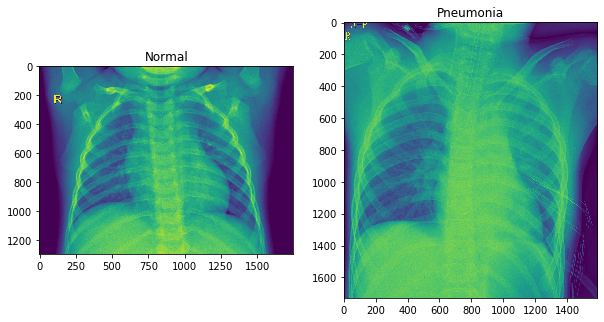

In [3]:
#Normal picture
rand_norm = np.random.randint(0, len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('normal picture title: ', norm_pic)

norm_pic_path = train_n + norm_pic

#Pneumonia picture
rand_p = np.random.randint(0, len(os.listdir(train_p)))
pne_pic =  os.listdir(train_p)[rand_norm]
print('pneumonia picture title:', pne_pic)

pne_path = train_p + pne_pic


# Load the images
norm_load = Image.open(norm_pic_path)
pne_load = Image.open(pne_path)

#Let's plt these images
f = plt.figure(figsize=(10,20))
a1 = f.add_subplot(1, 2, 1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(pne_load)
a2.set_title('Pneumonia')

<br>

## 케라스를 이용하여 모델을 형성하고 학습을 해봅시다.

---

## Libraries 설명

**`Sequential`**은 모델을 쌓는 list라고 생각하시면 편합니다.  
**`Conv2D, Flatten, Dense`**는 CNN에 매우 기본적으로 사용되어지는 Layer입니다.  
**`ImageDataGenerator`**는 dataset을 모델에 input하기 위해 사용되어 지는 함수입니다.  

In [4]:
# Keras Libraries
import keras 
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator

In [5]:
# Fitting the CNN to the images

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)  #Image normalization.

batch_size = 32
training_set = train_datagen.flow_from_directory('./dataset/chest_xray/train',
                                                 target_size = (64, 64),
                                                 batch_size = batch_size,
                                                 class_mode = 'binary')# 다중 분류 문제일 경우 'categorical'

validation_generator = test_datagen.flow_from_directory('./dataset/chest_xray/val/',
                                                        target_size=(64, 64),
                                                        batch_size=batch_size,
                                                        class_mode='binary')

test_set = test_datagen.flow_from_directory('./dataset/chest_xray/test',
                                            target_size = (64, 64),
                                            batch_size = batch_size,
                                            class_mode = 'binary')

Found 4567 images belonging to 2 classes.
Found 665 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


<br>

### Level 1
### `Conv2D + Flatten + Dense`

---

<br>

![CNN](./img/cnn_structure.jpeg)
### **<center>CNN basic structure</center>**

<br>

![acti](./img/activation.png)
### **<center>Activation function</center>**



<br>

![optim](./img/SGD.png)
### **<center>SGD</center>**

<br>

![optim](./img/SGD2.png)
### **<center>SGD</center>**

<br>

![optim](./img/optimizers.png)
### **<center>Optimizers</center>**

<br>

In [6]:
# 케라스를 이용한 CNN모델 만들기
cnn_level1 = Sequential()

#Convolution
cnn_level1.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(64, 64, 3)))

# 2nd Convolution
cnn_level1.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu"))

# Flatten the layer
cnn_level1.add(Flatten())

# Fully Connected Layers
cnn_level1.add(Dense(activation = 'relu', units = 128))
cnn_level1.add(Dense(activation = 'sigmoid', units = 1))

# Compile the Neural network
cnn_level1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [7]:
cnn_level1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
flatten (Flatten)            (None, 115200)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               14745728  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 14,756,001
Trainable params: 14,756,001
Non-trainable params: 0
_________________________________________________________________


In [9]:
cnn_model = cnn_level1.fit(training_set,
                           steps_per_epoch = num_train//batch_size,
                           epochs = 5,
                           validation_data = validation_generator,
                           validation_steps = num_val//batch_size)

Epoch 1/2
142/142 [==============================] - 154s 1s/step - loss: 0.1436 - accuracy: 0.9453 - val_loss: 0.1762 - val_accuracy: 0.9328
Epoch 2/2
  7/142 [>.............................] - ETA: 43s - loss: 0.1487 - accuracy: 0.9375

KeyboardInterrupt: 

In [17]:
test_accu = cnn_level1.evaluate(test_set, steps = num_test//batch_size)
print('The testing accuracy is :',test_accu[1]*100, '%')
print('The testing loss is :', test_accu[0])

20/20 [==============================] - 6s 290ms/step - loss: 0.1962 - accuracy: 0.9312
The testing accuracy is : 93.12499761581421 %
The testing loss is : 0.19618436694145203


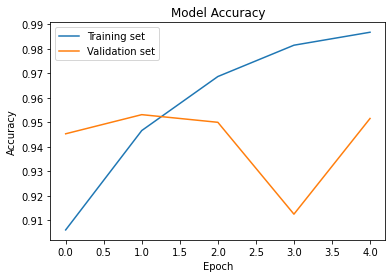

In [11]:
# Accuracy 
plt.plot(cnn_model.history['accuracy'])
plt.plot(cnn_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

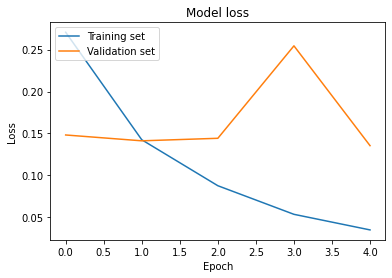

In [12]:
# Loss
plt.plot(cnn_model.history['loss'])
plt.plot(cnn_model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

<br>

### Level 2
### Conv2D + `Max Pooling` + Flatten + Dense

---

![pooling](./img/pooling.png)
### **<center>Poolings</center>**
<br>

![layers](./img/pooling_layer.png)

In [12]:
from keras.layers import MaxPooling2D

In [13]:
# MaxPooling 추가하기

cnn_level2 = Sequential()

#Convolution + Maxpooling
cnn_level2.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(64, 64, 3)))
cnn_level2.add(MaxPooling2D(pool_size = (2, 2)))

# 2nd Convolution + Maxpooling
cnn_level2.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu"))
cnn_level2.add(MaxPooling2D(pool_size = (2, 2)))

# Flatten the layer
cnn_level2.add(Flatten())

# Fully Connected Layers
cnn_level2.add(Dense(activation = 'relu', units = 128))
cnn_level2.add(Dense(activation = 'sigmoid', units = 1))

# Compile the Neural network
cnn_level2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [14]:
cnn_level2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [15]:
cnn_model = cnn_level2.fit(training_set,
                    steps_per_epoch = num_train//batch_size,
                    epochs = 1,
                    validation_data = validation_generator,
                    validation_steps = num_val//batch_size)

142/142 [==============================] - 50s 353ms/step - loss: 0.2464 - accuracy: 0.9021 - val_loss: 0.1654 - val_accuracy: 0.9312


In [16]:
test_accu = cnn_level2.evaluate(test_set, steps = num_test//batch_size)
print('The testing accuracy is :',test_accu[1]*100, '%')
print('The testing loss is :', test_accu[0])

19/19 [==============================] - 7s 355ms/step - loss: 0.9407 - accuracy: 0.7204
The testing accuracy is : 72.03947305679321 %
The testing loss is : 0.9406836628913879


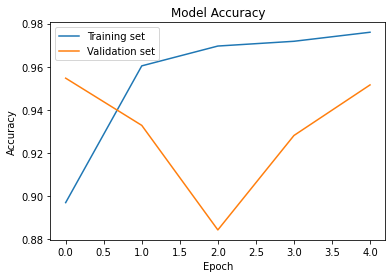

In [18]:
# Accuracy 
plt.plot(cnn_model.history['accuracy'])
plt.plot(cnn_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

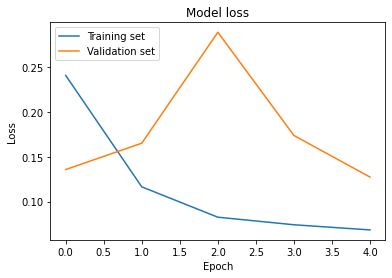

In [19]:
# Loss
plt.plot(cnn_model.history['loss'])
plt.plot(cnn_model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

<br>
<br>

### Level 3
### Conv2D + Max Pooling + Flatten + Dense + `Dropout`

---

![dropout](./img/dropout.png)

### **<center>Dropout</center>**

<br>

In [18]:
from keras.layers import Dropout

In [19]:
# Dropout추가하기

cnn_level3 = Sequential()

#Convolution + Maxpooling
cnn_level3.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(64, 64, 3)))
cnn_level3.add(MaxPooling2D(pool_size = (2, 2)))

# 2nd Convolution + Maxpooling
cnn_level3.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu"))
cnn_level3.add(MaxPooling2D(pool_size = (2, 2)))

# Flatten the layer
cnn_level3.add(Flatten())

# Fully Connected Layers
cnn_level3.add(Dropout(rate=0.2))
cnn_level3.add(Dense(activation = 'relu', units = 128))
cnn_level3.add(Dropout(rate=0.2))
cnn_level3.add(Dense(activation = 'sigmoid', units = 1))

# Compile the Neural network
cnn_level3.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [20]:
cnn_level3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dropout (Dropout)            (None, 6272)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

In [21]:
cnn_model = cnn_level3.fit(training_set,
                    steps_per_epoch = num_train//batch_size,
                    epochs = 1,
                    validation_data = validation_generator,
                    validation_steps = num_val//batch_size)

142/142 [==============================] - 50s 349ms/step - loss: 0.2389 - accuracy: 0.9003 - val_loss: 0.1723 - val_accuracy: 0.9438


In [22]:
test_accu = cnn_level3.evaluate(test_set, steps = num_test//batch_size)
print('The testing accuracy is :',test_accu[1]*100, '%')
print('The testing loss is :', test_accu[0])

19/19 [==============================] - 4s 229ms/step - loss: 0.8111 - accuracy: 0.7352
The testing accuracy is : 73.5197365283966 %
The testing loss is : 0.8111230134963989


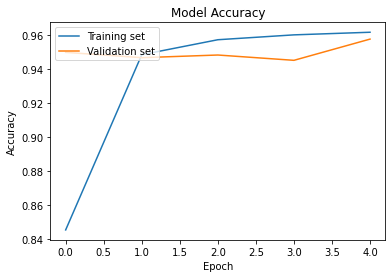

In [25]:
# Accuracy 
plt.plot(cnn_model.history['accuracy'])
plt.plot(cnn_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

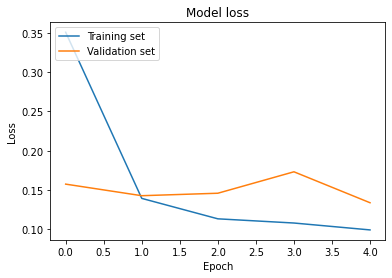

In [26]:
# Loss
plt.plot(cnn_model.history['loss'])
plt.plot(cnn_model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

<br>
<br>
<br>

### Level 4
### Conv2D + Max Pooling + Flatten + Dense + `Batch Normalization`

---

![batch1](./img/batch1.png)
![batch2](./img/batch2.png)
![batch3](./img/batch3.png)
![batch4](./img/batch4.png)

In [23]:
from keras.layers import BatchNormalization, Activation

In [30]:
# Batchnorm 추가하기

cnn_level4 = Sequential()

#Convolution + Maxpooling + Batchnorm
cnn_level4.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(64, 64, 3)))
cnn_level4.add(BatchNormalization())
cnn_level4.add(Activation('relu'))
cnn_level4.add(MaxPooling2D(pool_size = (2, 2)))

# 2nd Convolution + Maxpooling + Batchnorm
cnn_level4.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
cnn_level4.add(MaxPooling2D(pool_size = (2, 2)))

# Flatten the layer
cnn_level4.add(Flatten())

# Fully Connected Layers
cnn_level4.add(Dense(activation = 'relu', units = 128))
cnn_level4.add(Dense(activation = 'sigmoid', units = 1))

# Compile the Neural network
cnn_level4.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [31]:
cnn_level4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 62, 62, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 29, 29, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 29, 29, 32)       

In [32]:
cnn_model = cnn_level4.fit(training_set,
                    steps_per_epoch = num_train//batch_size,
                    epochs = 1,
                    validation_data = validation_generator,
                    validation_steps = num_val//batch_size)

142/142 [==============================] - 52s 367ms/step - loss: 0.3614 - accuracy: 0.8986 - val_loss: 1.7751 - val_accuracy: 0.6625


In [33]:
test_accu = cnn_level4.evaluate(test_set, steps = num_test//batch_size)
print('The testing accuracy is :',test_accu[1]*100, '%')
print('The testing loss is :', test_accu[0])

19/19 [==============================] - 4s 196ms/step - loss: 2.2005 - accuracy: 0.6250
The testing accuracy is : 62.5 %
The testing loss is : 2.200526475906372


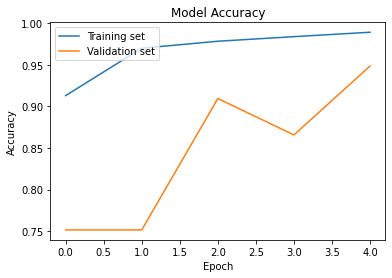

In [38]:
# Accuracy 
plt.plot(cnn_model.history['accuracy'])
plt.plot(cnn_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

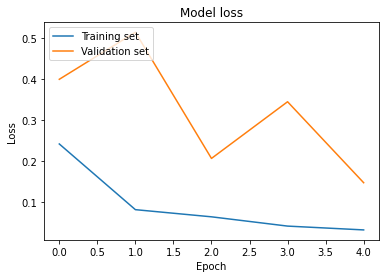

In [39]:
# Loss
plt.plot(cnn_model.history['loss'])
plt.plot(cnn_model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

<br>
<br>
<br>

### 번외편

In [34]:
# Batchnorm 추가하기

cnn_level4_ = Sequential()

#Convolution + Maxpooling + Batchnorm
cnn_level4_.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(64, 64, 3)))
cnn_level4_.add(BatchNormalization())
cnn_level4_.add(Activation('relu'))
cnn_level4_.add(MaxPooling2D(pool_size = (2, 2)))

# 2nd Convolution + Maxpooling + Batchnorm
cnn_level4_.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
cnn_level4_.add(MaxPooling2D(pool_size = (2, 2)))

# Flatten the layer
cnn_level4_.add(Flatten())

# Fully Connected Layers
cnn_level4_.add(Dropout(rate=0.2))
cnn_level4_.add(Dense(activation = 'relu', units = 128))
cnn_level4_.add(Dropout(rate=0.2))
cnn_level4_.add(Dense(activation = 'sigmoid', units = 1))

# Compile the Neural network
cnn_level4_.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [35]:
cnn_level4_.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
batch_normalization_3 (Batch (None, 62, 62, 32)        128       
_________________________________________________________________
activation_3 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 6272)             

In [36]:
cnn_model = cnn_level4_.fit(training_set,
                    steps_per_epoch = num_train//batch_size,
                    epochs = 1,
                    validation_data = validation_generator,
                    validation_steps = num_val//batch_size)

142/142 [==============================] - 51s 362ms/step - loss: 0.1649 - accuracy: 0.9407 - val_loss: 0.4383 - val_accuracy: 0.7578


In [37]:
test_accu = cnn_level4_.evaluate(test_set, steps = num_test//batch_size)
print('The testing accuracy is :',test_accu[1]*100, '%')
print('The testing loss is :', test_accu[0])

19/19 [==============================] - 4s 227ms/step - loss: 0.7499 - accuracy: 0.6447
The testing accuracy is : 64.47368264198303 %
The testing loss is : 0.7498764395713806


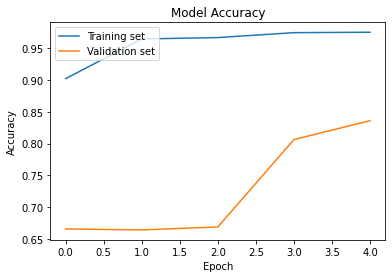

In [52]:
# Accuracy 
plt.plot(cnn_model.history['accuracy'])
plt.plot(cnn_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

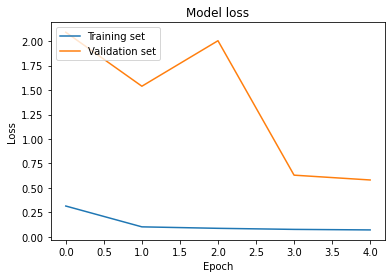

In [53]:
# Loss
plt.plot(cnn_model.history['loss'])
plt.plot(cnn_model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

<br>
<br>
<br>

### Level 5
### Level 4 + `Data augmentation`

---

![flip](./img/flip.png)
### **<center>Horizontal Flip</center>**
<br>

![crop](./img/crop.png)
### **<center>Crop</center>**
<br>

![etc](./img/etc.png)
### **<center>ETC</center>**
<br>



In [38]:
# Fitting the CNN to the images
# Data Augmentation추가하기

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)  #Image normalization.

batch_size = 32
training_set = train_datagen.flow_from_directory('./dataset/chest_xray/train',
                                                 target_size = (64, 64),
                                                 batch_size = batch_size,
                                                 class_mode = 'binary')# 다중 분류 문제일 경우 'categorical'

validation_generator = test_datagen.flow_from_directory('./dataset/chest_xray/val/',
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='binary')

test_set = test_datagen.flow_from_directory('./dataset/chest_xray/test',
                                            target_size = (64, 64),
                                            batch_size = batch_size,
                                            class_mode = 'binary')

Found 4567 images belonging to 2 classes.
Found 665 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [39]:
# Batchnorm 추가하기

cnn_level4 = Sequential()

#Convolution + Maxpooling + Batchnorm
cnn_level4.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(64, 64, 3)))
cnn_level4.add(BatchNormalization())
cnn_level4.add(Activation('relu'))
cnn_level4.add(MaxPooling2D(pool_size = (2, 2)))

# 2nd Convolution + Maxpooling + Batchnorm
cnn_level4.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
cnn_level4.add(MaxPooling2D(pool_size = (2, 2)))

# Flatten the layer
cnn_level4.add(Flatten())

# Fully Connected Layers
cnn_level4.add(Dense(activation = 'relu', units = 128))
cnn_level4.add(Dense(activation = 'sigmoid', units = 1))

# Compile the Neural network
cnn_level4.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [40]:
cnn_level4.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
batch_normalization_4 (Batch (None, 62, 62, 32)        128       
_________________________________________________________________
activation_4 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 6272)             

In [41]:
cnn_model = cnn_level4.fit(training_set,
                    steps_per_epoch = num_train//batch_size,
                    epochs = 5,
                    validation_data = validation_generator,
                    validation_steps = num_val//batch_size)

Epoch 1/5
142/142 [==============================] - 49s 345ms/step - loss: 0.3257 - accuracy: 0.8770 - val_loss: 0.4694 - val_accuracy: 0.7250
Epoch 2/5
142/142 [==============================] - 55s 388ms/step - loss: 0.1861 - accuracy: 0.9270 - val_loss: 0.4698 - val_accuracy: 0.7516
Epoch 3/5
142/142 [==============================] - 55s 387ms/step - loss: 0.1543 - accuracy: 0.9394 - val_loss: 0.2323 - val_accuracy: 0.9281
Epoch 4/5
142/142 [==============================] - 55s 389ms/step - loss: 0.1458 - accuracy: 0.9420 - val_loss: 0.2033 - val_accuracy: 0.9266
Epoch 5/5
142/142 [==============================] - 55s 391ms/step - loss: 0.1375 - accuracy: 0.9488 - val_loss: 0.2017 - val_accuracy: 0.9297


In [42]:
test_accu = cnn_level4.evaluate(test_set, steps = num_test//batch_size)
print('The testing accuracy is :',test_accu[1]*100, '%')
print('The testing loss is :', test_accu[0])

19/19 [==============================] - 4s 231ms/step - loss: 0.2731 - accuracy: 0.8980
The testing accuracy is : 89.80262875556946 %
The testing loss is : 0.2731190621852875


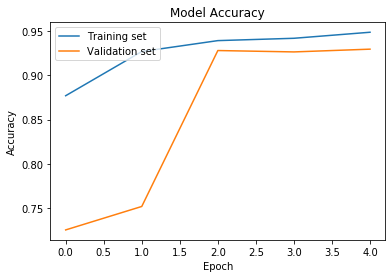

In [43]:
# Accuracy 
plt.plot(cnn_model.history['accuracy'])
plt.plot(cnn_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

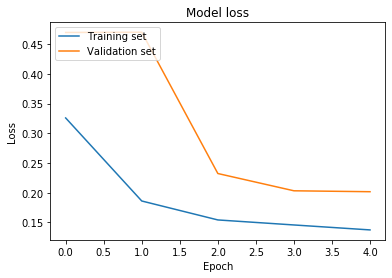

In [44]:
# Loss
plt.plot(cnn_model.history['loss'])
plt.plot(cnn_model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()